In [1]:
import sys
sys.path.append("../src/")

from neural_pid_controller import NeuralPidController
from bathtub import Bathtub
from cournot import CournotCompetition
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_nn_pid

## Neural PID Controller

### Bathtub

Epoch 0  mse:  1.6916945
Epoch 1  mse:  1.1321859
Epoch 2  mse:  0.7635698
Epoch 3  mse:  0.510269
Epoch 4  mse:  0.3418499
Epoch 5  mse:  0.22691408
Epoch 6  mse:  0.14941256
Epoch 7  mse:  0.09879446
Epoch 8  mse:  0.06576433
Epoch 9  mse:  0.04220124
Epoch 10  mse:  0.028206473
Epoch 11  mse:  0.018179644
Epoch 12  mse:  0.011332938
Epoch 13  mse:  0.007520561
Epoch 14  mse:  0.0051326305
Epoch 15  mse:  0.0035456524
Epoch 16  mse:  0.0024868918
Epoch 17  mse:  0.0014720641
Epoch 18  mse:  0.00093685
Epoch 19  mse:  0.0007533662
Epoch 20  mse:  0.00057242287
Epoch 21  mse:  0.00044088965
Epoch 22  mse:  0.00027330968
Epoch 23  mse:  0.00015941066
Epoch 24  mse:  0.00013897991
Epoch 25  mse:  9.977296e-05
Epoch 26  mse:  6.048195e-05
Epoch 27  mse:  4.9172155e-05
Epoch 28  mse:  1.1406041e-05
Epoch 29  mse:  4.8352907e-05


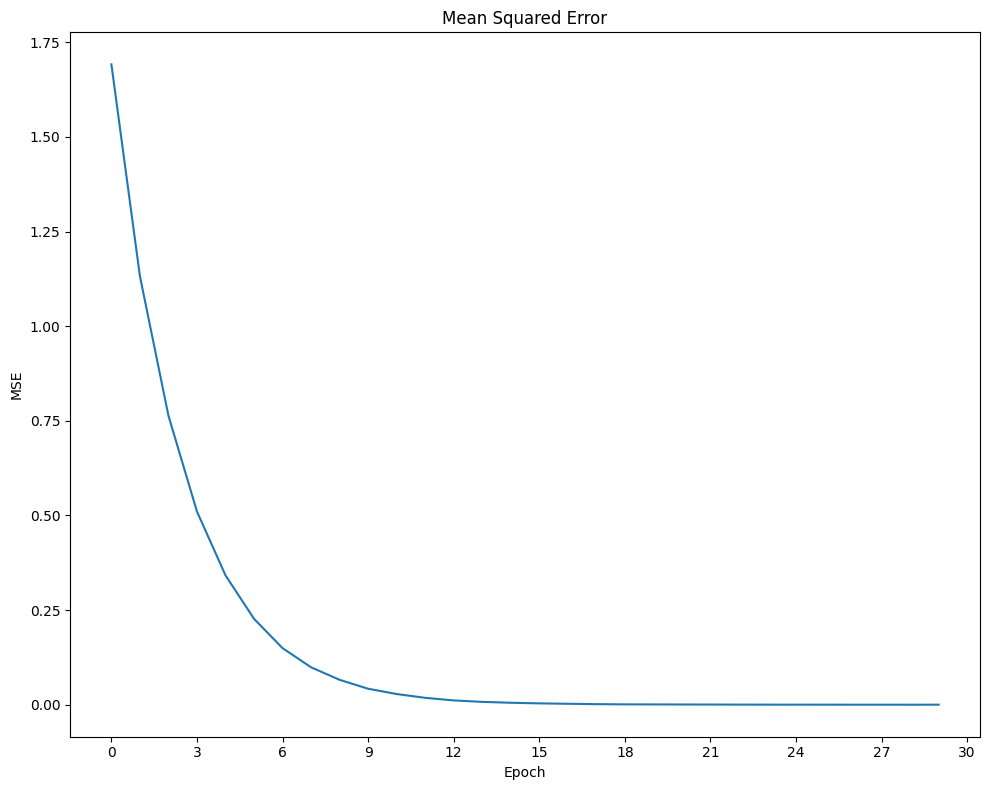

In [2]:
### Bathtub params:
A = 10.0      # cross-sectional area
C = A/100   # cross-sectional-drain area
H = 10.0      # initial height
g = 9.8     # gravitational constant

### ConSys params:
no_epochs = 30
timesteps_per_epoch = 20
learning_rate = 0.01
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 1.0
max_weight_value = 1.0

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = Bathtub(A, C, H, g)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


### Cournot

Epoch 0  mse:  0.28751096
Epoch 1  mse:  0.08110522
Epoch 2  mse:  0.052595507
Epoch 3  mse:  0.043701824
Epoch 4  mse:  0.036822457
Epoch 5  mse:  0.035970867
Epoch 6  mse:  0.03196906
Epoch 7  mse:  0.030835602
Epoch 8  mse:  0.029481051
Epoch 9  mse:  0.026820466
Epoch 10  mse:  0.025790637
Epoch 11  mse:  0.02464632
Epoch 12  mse:  0.0244093
Epoch 13  mse:  0.024034826
Epoch 14  mse:  0.023433322
Epoch 15  mse:  0.021398509
Epoch 16  mse:  0.02128301
Epoch 17  mse:  0.021156995
Epoch 18  mse:  0.019870574
Epoch 19  mse:  0.019903883
Epoch 20  mse:  0.019043319
Epoch 21  mse:  0.018644636
Epoch 22  mse:  0.018090744
Epoch 23  mse:  0.018160485
Epoch 24  mse:  0.017180942
Epoch 25  mse:  0.016752249
Epoch 26  mse:  0.016625894
Epoch 27  mse:  0.016533708
Epoch 28  mse:  0.016445944
Epoch 29  mse:  0.016168058
Epoch 30  mse:  0.016346784
Epoch 31  mse:  0.015393031
Epoch 32  mse:  0.015149529
Epoch 33  mse:  0.014888945
Epoch 34  mse:  0.0144735
Epoch 35  mse:  0.014778224
Epoch 36  m

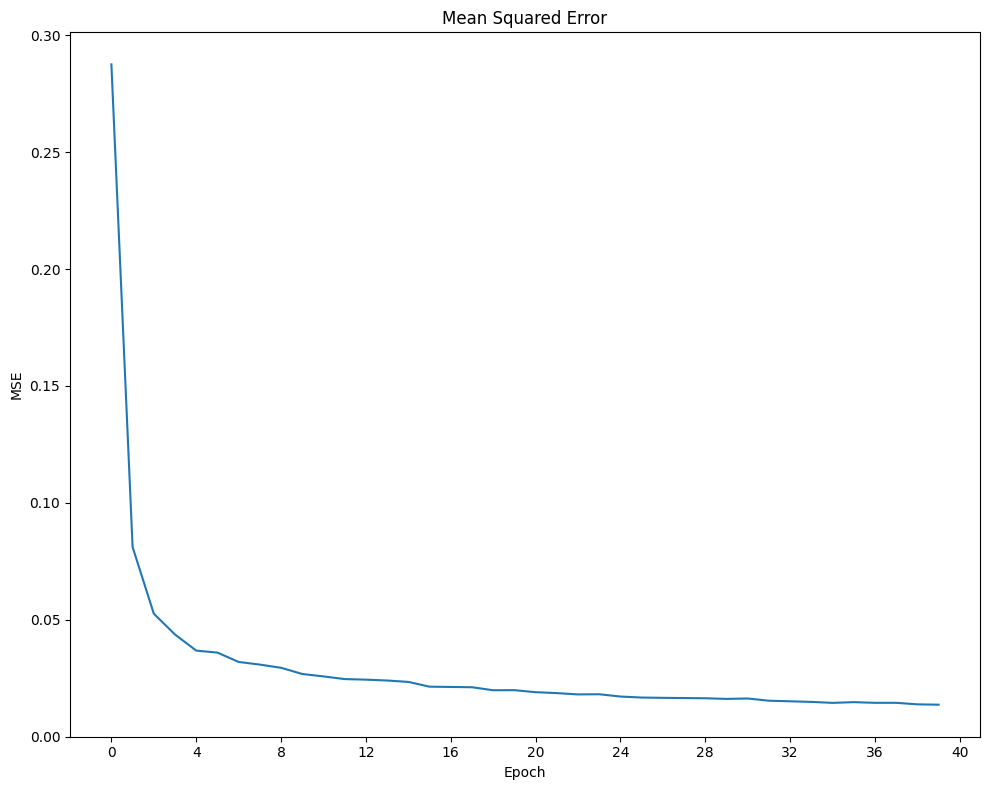

In [3]:
### CournoutCompetition params:
T = 0.6   # Target profit per timestep
c_m = 0.1   # Marginal cost
q1 = 0.1   # initial quantity produced by 1
q2 = 0.3   # initial quantity produced by 2
p_max = 2.0 # maximum market price

### ConSys params:
no_epochs = 40
timesteps_per_epoch = 10
learning_rate = 0.001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 0.01
max_weight_value = 0.01

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = CournotCompetition(target_profit=T, marginal_unit_cost=c_m, own_quantity=q1, competitor_quantity=q2, maximum_price=p_max)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


### Rabbits

In [4]:
""" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey
on the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction
with foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time
varying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is 
represented by U (the control signal).

Foxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. 
There is also some noise in the birthrate of foxes, represented by the term D (disturbance).


Task: keep rabbit population stable at initial population.
We assume that wildlife population management always make sure that neither the rabbit population nor the fox population
ever gets lower than 1 individual.
"""

" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey\non the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction\nwith foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time\nvarying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is \nrepresented by U (the control signal).\n\nFoxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. \nThere is also some noise in the birthrate of foxes, represented by the term D (disturbance).\n\n\nTask: keep rabbit population stable at initial population.\nWe assume that wildlife population management always make sure that neither the rabbit population nor the fox population\never gets lower than 1 individual.\n"

Epoch 0  mse:  277.442
Epoch 1  mse:  237.68144
Epoch 2  mse:  200.30002
Epoch 3  mse:  163.92908
Epoch 4  mse:  128.09721
Epoch 5  mse:  99.91589
Epoch 6  mse:  75.84261
Epoch 7  mse:  59.01295
Epoch 8  mse:  46.194263
Epoch 9  mse:  38.62687
Epoch 10  mse:  34.608944
Epoch 11  mse:  32.07736
Epoch 12  mse:  30.773746
Epoch 13  mse:  30.59915
Epoch 14  mse:  30.738012
Epoch 15  mse:  29.78101
Epoch 16  mse:  30.702799
Epoch 17  mse:  30.12599
Epoch 18  mse:  30.449402
Epoch 19  mse:  30.534876
Epoch 20  mse:  30.34409
Epoch 21  mse:  30.126356
Epoch 22  mse:  29.402918
Epoch 23  mse:  29.738398
Epoch 24  mse:  29.526724
Epoch 25  mse:  30.084595
Epoch 26  mse:  30.182606
Epoch 27  mse:  30.531607
Epoch 28  mse:  30.63325
Epoch 29  mse:  30.280745
Epoch 30  mse:  30.831968
Epoch 31  mse:  29.70995
Epoch 32  mse:  29.517576
Epoch 33  mse:  29.917322
Epoch 34  mse:  30.57173
Epoch 35  mse:  30.005787
Epoch 36  mse:  29.985483
Epoch 37  mse:  30.189894
Epoch 38  mse:  30.952686
Epoch 39  

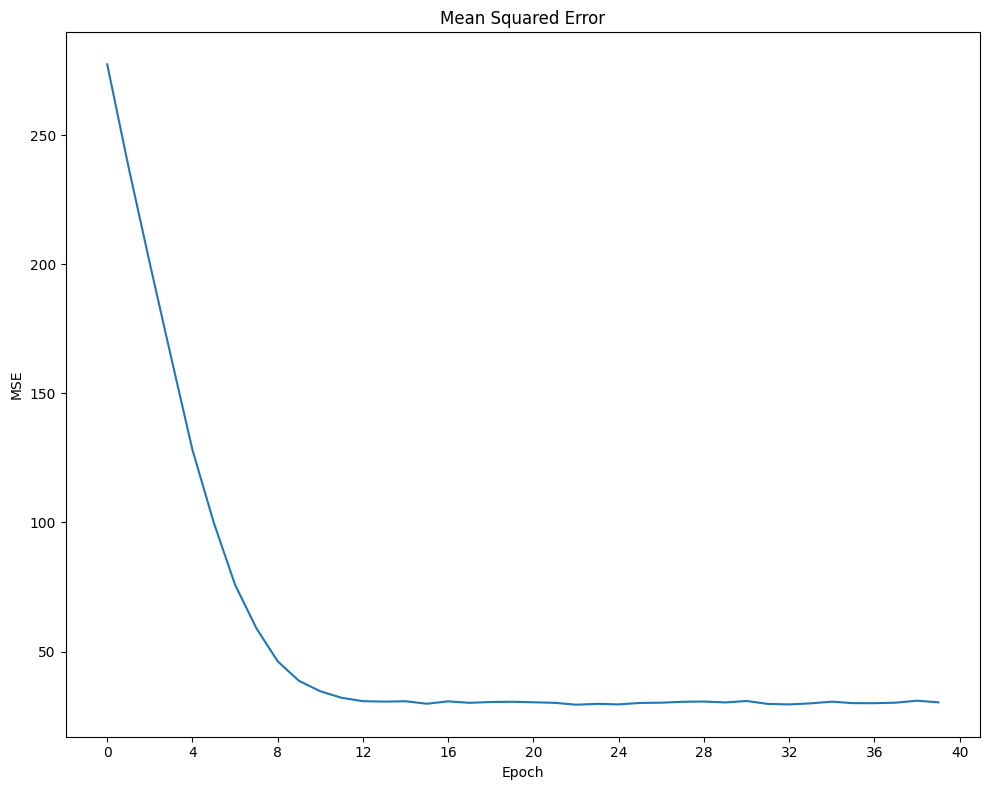

In [5]:
### Rabbit population params:
a1 = 0.35     # rabbit birth rate (originally 0.35)
a2 = 0.01     # rabbit natural death rate
a3 = 0.05     # rabbit killed by fox rate
a4 = 0.3      # rabbit external birthrate factors param 1
a5 = 0.4      # rabbit external birthrate factors param 2
b1 = 0.3      # fox natural death rate
b2 = 0.015    # fox birthrate
rabbit_start_population = 26
fox_start_population = 3

### ConSys params:
no_epochs = 40
timesteps_per_epoch = 10
learning_rate = 0.001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 0.01
max_weight_value = 0.01

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value, seed=42)
plant = Rabbits(a1, a2, a3, a4, a5, b1, b2, rabbit_start_population, fox_start_population)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)
